In [2]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax


In [4]:
from google.colab import files
uploaded = files.upload()

Saving IMDB-Movie-Data.csv to IMDB-Movie-Data.csv


In [5]:
df = pd.read_csv('IMDB-Movie-Data.csv')

In [6]:
df.shape

(1000, 12)

In [7]:
df = df.dropna()

In [8]:
df.shape

(907, 12)

In [9]:
df = df.reset_index()


4.0

In [10]:
for i in range(len(df['Rating'])):
    if df['Rating'][i] > 0 and df['Rating'][i] <= 2:
        df['Rating'][i] = 1
    elif df['Rating'][i] > 2 and df['Rating'][i] <= 4:
        df['Rating'][i] = 2
    elif df['Rating'][i] > 4 and df['Rating'][i] <= 6:
        df['Rating'][i] = 3
    elif df['Rating'][i] > 6 and df['Rating'][i] <= 8:
        df['Rating'][i] = 4
    elif df['Rating'][i] > 8 and df['Rating'][i] <= 10:
        df['Rating'][i] = 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib

In [11]:
df = df.drop(columns=['Rank','index'])

In [12]:
list(df)

['Title',
 'Genre',
 'Description',
 'Director',
 'Actors',
 'Year',
 'Runtime (Minutes)',
 'Rating',
 'Votes',
 'Revenue (Millions)',
 'Metascore']

In [13]:
x_data = df[['Runtime (Minutes)','Votes','Revenue (Millions)','Metascore']]

In [14]:
y_data = df[['Rating']]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.2, shuffle=True)

In [16]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred_knn = knn.predict(x_test)

In [18]:
knn_accuracy = knn.score(x_test,y_test)

In [19]:
svc = OneVsRestClassifier(SVC(C=2.0)).fit(x_train, y_train)

In [20]:
y_pred_svc = svc.predict(x_test)

In [21]:
svc_accuracy = svc.score(x_test,y_test)

In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [23]:
svc_precision = precision_score(y_test, y_pred_svc, average='macro')

svc_precision

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4301675977653631

In [24]:
svc_recall = recall_score(y_test, y_pred_svc, average='macro')

In [25]:
svc_f1 = f1_score(y_test, y_pred_svc, average='macro')

In [26]:
knn_precision = precision_score(y_test, y_pred_knn, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
knn_recall = recall_score(y_test, y_pred_knn, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
knn_f1 =f1_score(y_test, y_pred_knn, average='macro')

In [29]:
print(svc_accuracy)
print(knn_accuracy)

0.7252747252747253
0.7087912087912088


In [30]:
from matplotlib.colors import ListedColormap


In [31]:
x_data = x_data.to_numpy()

In [32]:
y_data = y_data.to_numpy()

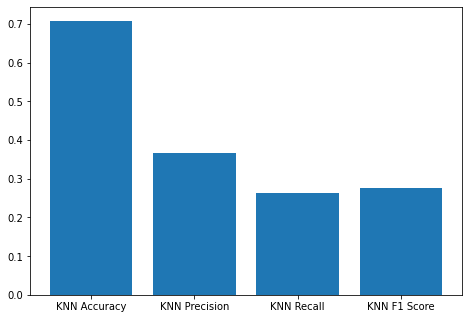

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['KNN Accuracy', 'KNN Precision', 'KNN Recall', 'KNN F1 Score']
scores = [knn_accuracy,knn_precision,knn_recall,knn_f1]
ax.bar(labels,scores)
plt.show()

In [34]:
print(svc_accuracy)
print(svc_precision)
print(svc_recall)
print(svc_f1)

0.7252747252747253
0.4301675977653631
0.3125
0.3094155844155844


In [35]:
print(knn_accuracy)
print(knn_precision)
print(knn_recall)
print(knn_f1)

0.7087912087912088
0.3675609756097561
0.26259689922480617
0.2757759486046979


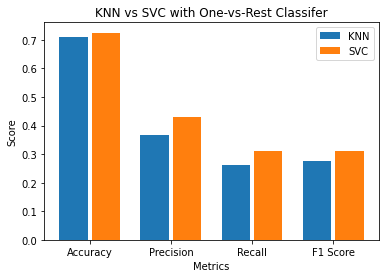

In [38]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]
svc_scores = [svc_accuracy, svc_precision, svc_recall, svc_f1]

X_axis = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.bar(X_axis - 0.2, knn_scores, width, label = 'KNN')
plt.bar(X_axis + 0.2, svc_scores, width, label = 'SVC')
  
plt.xticks(X_axis, labels)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("KNN vs SVC with One-vs-Rest Classifer")
plt.legend()
plt.show()